# Tugas 1

By: Arieska Restu

## 1. Overview

Analisis conversion rate merupakan suatu pencarian insight data persentase pengunjung website serta tindakann apa saja yang mereka lakukan selama mengunjungi situs, dan apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama berkunjung di website tersebut, hal in dapat dilakukan dengan melakukan featire engeenering pada variable data yang tersaji, sehingga dapat menghasilkan satu kolom baru yaitu Conversion rate. Setelah Conversion rate terbentuk, maka dapat dianalisis dengan variable lain seperti umur, penghasilan, pengeluaran, dll. sehingga dapat menemukan suatu pola perilaku konsumen.

## 2. Stages of Work 

### 2.1 Import Library & Dataset

In [104]:
import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [2]:
# Membaca dataset
df_ori = pd.read_csv('../data/marketing_campaign_data.csv')
df = pd.read_csv('../data/marketing_campaign_data.csv')

### 2.2 Feature Engineering

#### 2.2.1 Conversion Rate

In [3]:
# Conversion Rate: #response / #visit
df['Conversion_Rate'] = df['Response'] / df['NumWebVisitsMonth']

In [4]:
# result = train.loc[train['user_id'] == 5]
# result = df.loc[df['Conversion_Rate'].isna()]
df[['ID', 'Response', 'Conversion_Rate', 'NumWebVisitsMonth']].sample(7)

,ID,Response,Conversion_Rate,NumWebVisitsMonth
494,6605,0,0.000,7
353,11056,0,0.000,1
1687,2570,1,0.125,8
1355,3834,0,0.000,5
1890,2747,0,0.000,3
382,6878,0,0.000,7
1159,640,0,0.000,5


#### 2.2.2 Age Group

In [5]:
# Menghitung umur berdasarkan Year_Birth
year_now = datetime.date.today().year
df['Age'] = year_now - df['Year_Birth']

# Age_Group : Mengelompokkan umur ke beberapa kelompok
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Setengah Baya', 'Lanjut Usia']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [6]:
df[['ID', 'Age', 'Age_Group']].sample(7)

,ID,Age,Age_Group
1705,8799,40,Dewasa
2032,8625,48,Setengah Baya
1494,2005,34,Dewasa
1191,8732,55,Lanjut Usia
831,8560,32,Dewasa
520,3696,59,Lanjut Usia
1699,4676,73,Lanjut Usia


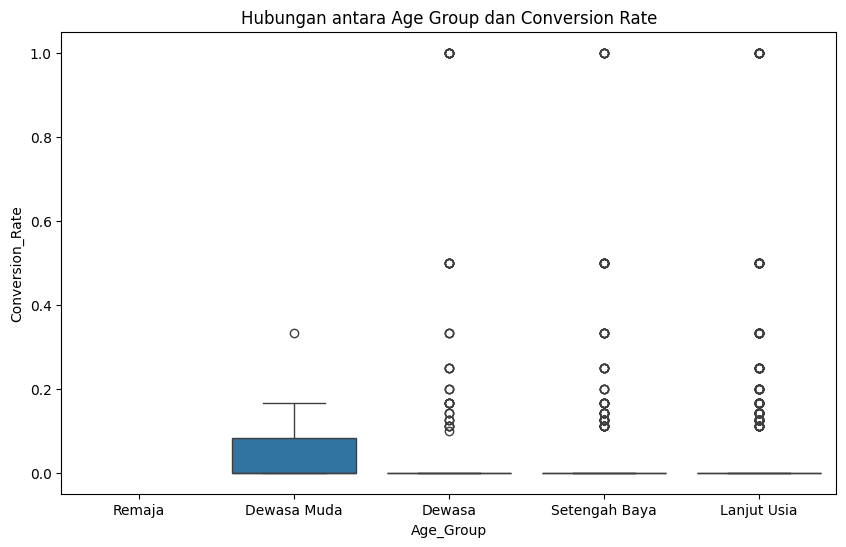

In [7]:
# Plot hubungan antara Conversion Rate dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Conversion_Rate', data=df)
plt.title('Hubungan antara Age Group dan Conversion Rate')
plt.show()

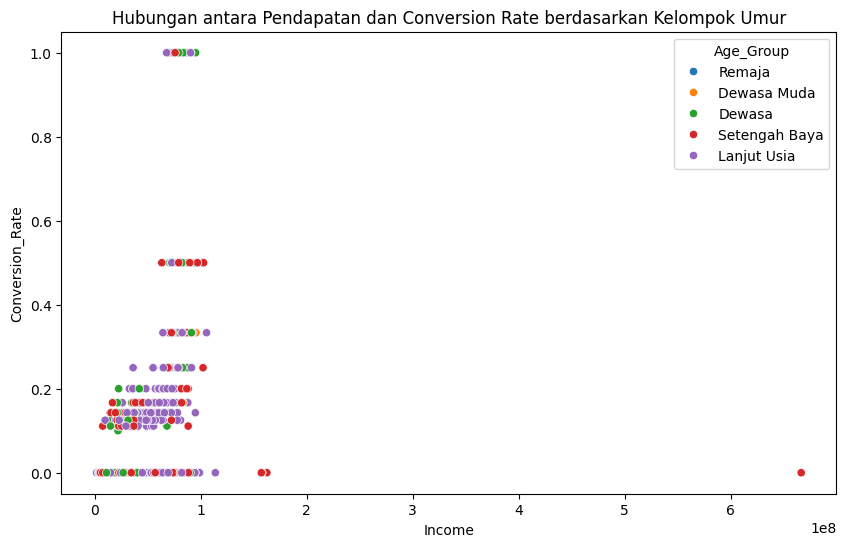

In [8]:
# Plot tambahan bisa dilakukan untuk pendapatan atau variabel lainnya
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Conversion_Rate', hue='Age_Group', data=df)
plt.title('Hubungan antara Pendapatan dan Conversion Rate berdasarkan Kelompok Umur')
plt.show()

#### 2.2.3 Total Kids

In [9]:
# Total_Kids : Jumlah anak berdasarkan Kidhome dan Teenhome
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

In [10]:
df[['ID', 'Kidhome', 'Teenhome', 'Total_Kids']].sample(7)

,ID,Kidhome,Teenhome,Total_Kids
1536,451,1,0,1
441,7495,0,1,1
1985,8619,0,1,1
349,11030,1,0,1
1378,8773,0,1,1
970,10981,0,0,0
586,9058,0,0,0


#### 2.2.4 Total Spending

In [11]:
# Total_Spending : Menjumlahkan seluruh pengeluaran produk
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [12]:
df[['ID', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending']].sample(7)

,ID,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spending
191,5602,466000,22000,432000,147000,113000,102000,1282000
2162,977,200000,19000,111000,50000,15000,19000,414000
2171,3968,918000,10000,129000,13000,0,129000,1199000
2167,3520,162000,28000,818000,0,28000,56000,1092000
553,9460,30000,3000,47000,19000,21000,42000,162000
373,1245,977000,12000,253000,16000,12000,101000,1371000
1317,4937,12000,2000,20000,3000,2000,5000,44000


#### 2.2.5 Total Purchases

In [13]:
# Total_Purchases : Menjumlahkan seluruh jenis transaksi
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [14]:
df[['ID', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].sample(7)

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
1152,10710,1,1,0,2,4
1567,4390,2,5,4,12,23
147,3120,1,1,0,2,4
2229,10084,2,2,1,2,7
643,2942,2,5,4,4,15
592,4501,1,3,7,9,20
44,2139,3,2,0,3,8


### 2.3 Exploration Data Analysis (EDA)

In [15]:
# 3. Jumlah Anak: Jumlah anak berdasarkan Kidhome dan Teenhome
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

#### 2.3.1 Quick EDA

In [16]:
# Informasi dataset
print("Info Dataset:")
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom : {df.shape[1]}")

Info Dataset:
Jumlah baris : 2240
Jumlah kolom : 36


In [17]:
# Informasi kolom
print("Info Kolom:")
print(df.info())

Info Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2240 non-null   int64   
 1   ID                   2240 non-null   int64   
 2   Year_Birth           2240 non-null   int64   
 3   Education            2240 non-null   object  
 4   Marital_Status       2240 non-null   object  
 5   Income               2216 non-null   float64 
 6   Kidhome              2240 non-null   int64   
 7   Teenhome             2240 non-null   int64   
 8   Dt_Customer          2240 non-null   object  
 9   Recency              2240 non-null   int64   
 10  MntCoke              2240 non-null   int64   
 11  MntFruits            2240 non-null   int64   
 12  MntMeatProducts      2240 non-null   int64   
 13  MntFishProducts      2240 non-null   int64   
 14  MntSweetProducts     2240 non-null   int64   
 15  MntGoldPr

- Terdapat kolom yang tidak memiliki nama.

In [18]:
# Pengecekan dataset
print("\nLima baris pertama dataset:")
df.head()


Lima baris pertama dataset:


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Age_Group,Total_Kids,Total_Spending,Total_Purchases
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,0.142857,67,Lanjut Usia,0,1617000,25
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,0.000000,70,Lanjut Usia,2,27000,6
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,0.000000,59,Lanjut Usia,0,776000,21
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,0.000000,40,Dewasa,1,53000,8
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,0.000000,43,Setengah Baya,1,422000,19


In [19]:
# Melihat deskripsi statistik dari dataset
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Total_Kids,Total_Spending,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,0.013393,0.009375,3.0,11.0,0.149107,0.043686,55.194196,0.950446,6.057982e+05,14.862054
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.114976,0.096391,0.0,0.0,0.356274,0.142981,11.984069,0.751803,6.022493e+05,7.677173
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,28.000000,0.000000,5.000000e+03,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,47.000000,0.000000,6.875000e+04,8.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,54.000000,1.000000,3.960000e+05,15.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,65.000000,1.000000,1.045500e+06,21.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,1.000000,1.000000,3.0,11.0,1.000000,1.000000,131.000000,3.000000,2.525000e+06,44.000000


- Rata-rata dari conversion_rate cukup rendah yakni 0.04, hal ini menunjukkan bahwa customer yang mengunjungi website lalu melakukan transaksi sangat sedikit.
- Distribusi dari total_spending tidak merata, hal ini terlihat dari mean dan median yang berbeda jauh

In [20]:
# Pengecekan data yang hilang
print("\nPengecekan Missing Values:")
df.isnull().sum()


Pengecekan Missing Values:


Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Conversion_Rate        11
Age                     0
Age_Group               0
Total_Kids              0
Total_Spending          0
Total_Purchases         0
dtype: int64

- Pada kolom Income terdapat 24 data yang missing value.
- Pada kolom Conversion_Rate terdapat 11 data yang missing value, hal ini dikarenakan nilai pada kolom Response dan NumWebVisitsMonth adalah 0.

In [21]:
# Data yang missing value pada kolom Conversion_Rate
# result = train.loc[train['user_id'] == 5]
result = df.loc[df['Conversion_Rate'].isna()]
result[['ID', 'Response', 'Conversion_Rate', 'NumWebVisitsMonth']][:7]

,ID,Response,Conversion_Rate,NumWebVisitsMonth
164,8475,0,NaN,0
655,5555,0,NaN,0
687,1501,0,NaN,0
905,11074,0,NaN,0
975,10286,0,NaN,0
1773,8584,0,NaN,0
1806,6237,0,NaN,0


In [22]:
result = df.loc[df['Income'].isna()]
result[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income']][:7]

,ID,Year_Birth,Education,Marital_Status,Income
10,1994,1983,S1,Menikah,NaN
27,5255,1986,S1,Lajang,NaN
43,7281,1959,S3,Lajang,NaN
48,7244,1951,S1,Lajang,NaN
58,8557,1982,S1,Lajang,NaN
71,10629,1973,D3,Menikah,NaN
90,8996,1957,S3,Menikah,NaN


In [23]:
# Pengecekan data yang duplicate
print("\nPengecekan Data Duplicate:")
df.duplicated().value_counts()


Pengecekan Data Duplicate:


False    2240
Name: count, dtype: int64

- Tidak ada data yang duplicate.

#### 2.3.2 Univariate Analysis

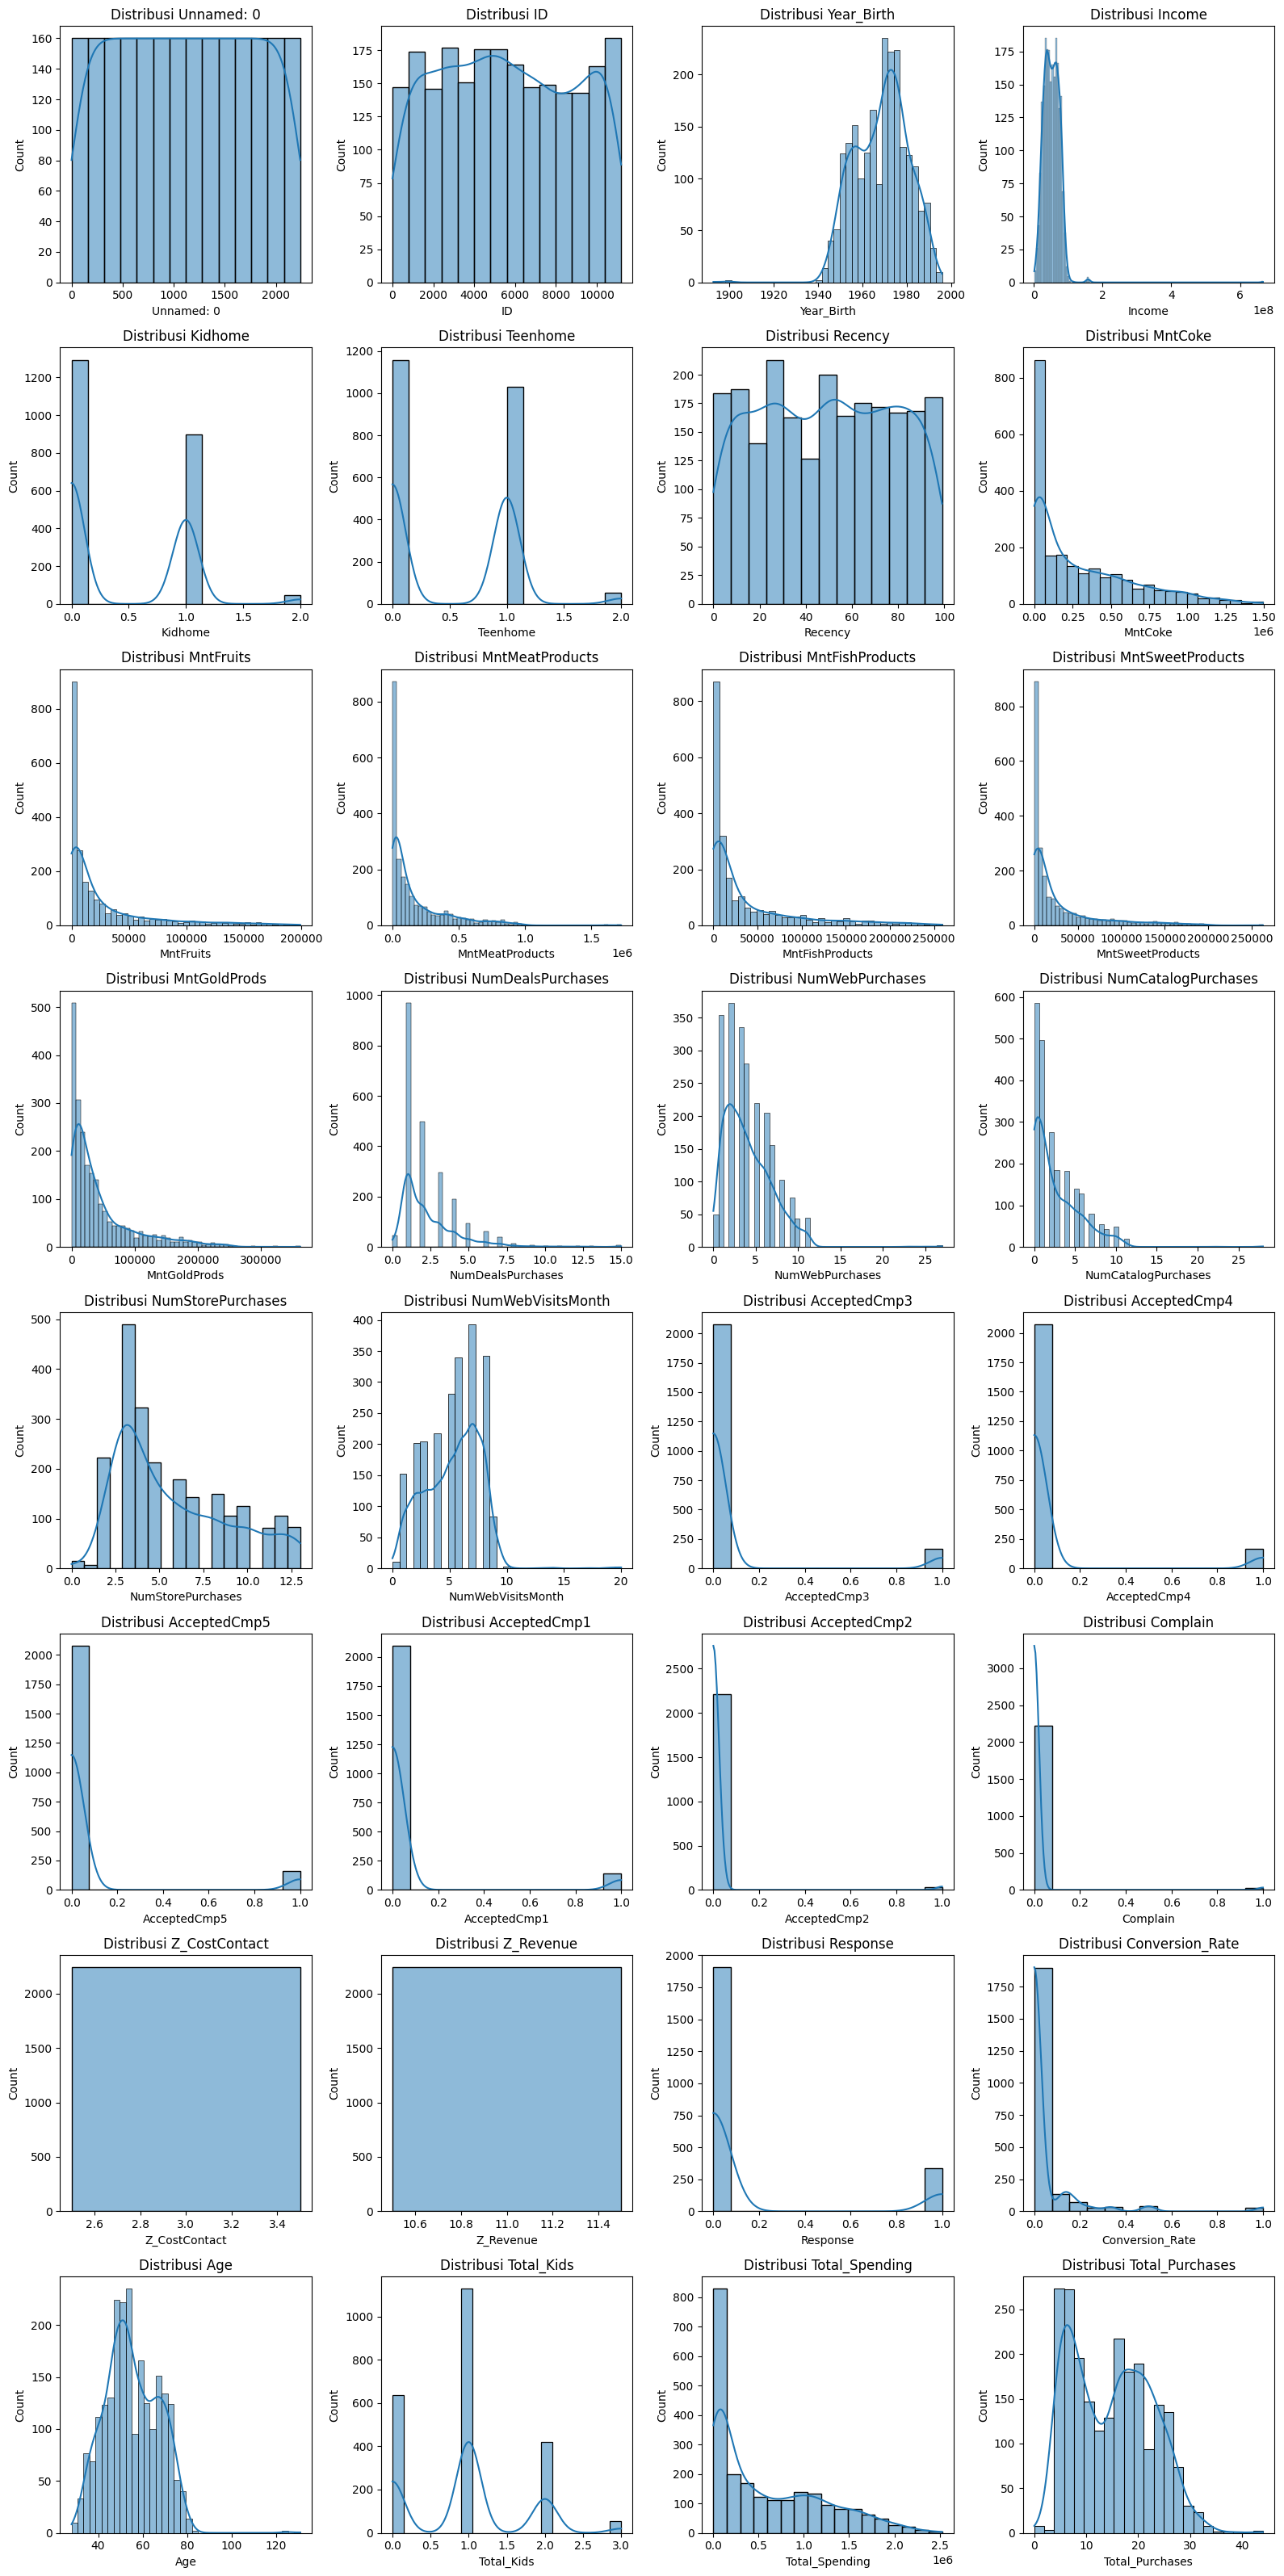

In [24]:
# Univariate Analysis for Numeric Variables

# Mengambil fitur numerik
numeric_features = df.select_dtypes(include=[np.number])

# Menentukan ukuran grid untuk subplot secara dinamis
num_features = len(numeric_features.columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 4, rows * 4))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

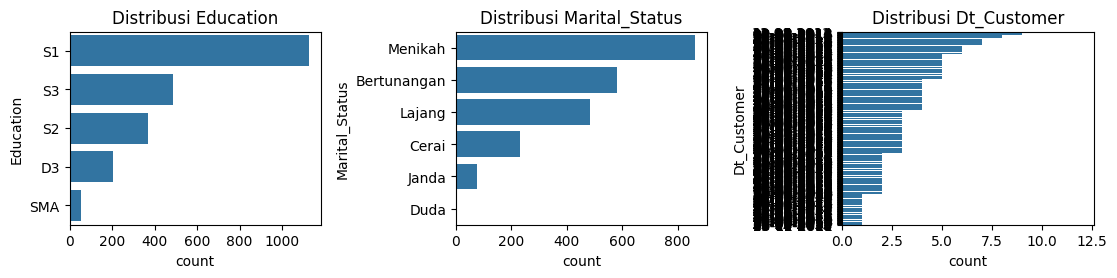

In [25]:
# Univariate Analysis for Categorical Variables
categorical_features = df.select_dtypes(include=[object])
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

#### 2.3.3 Multivariate Analysis

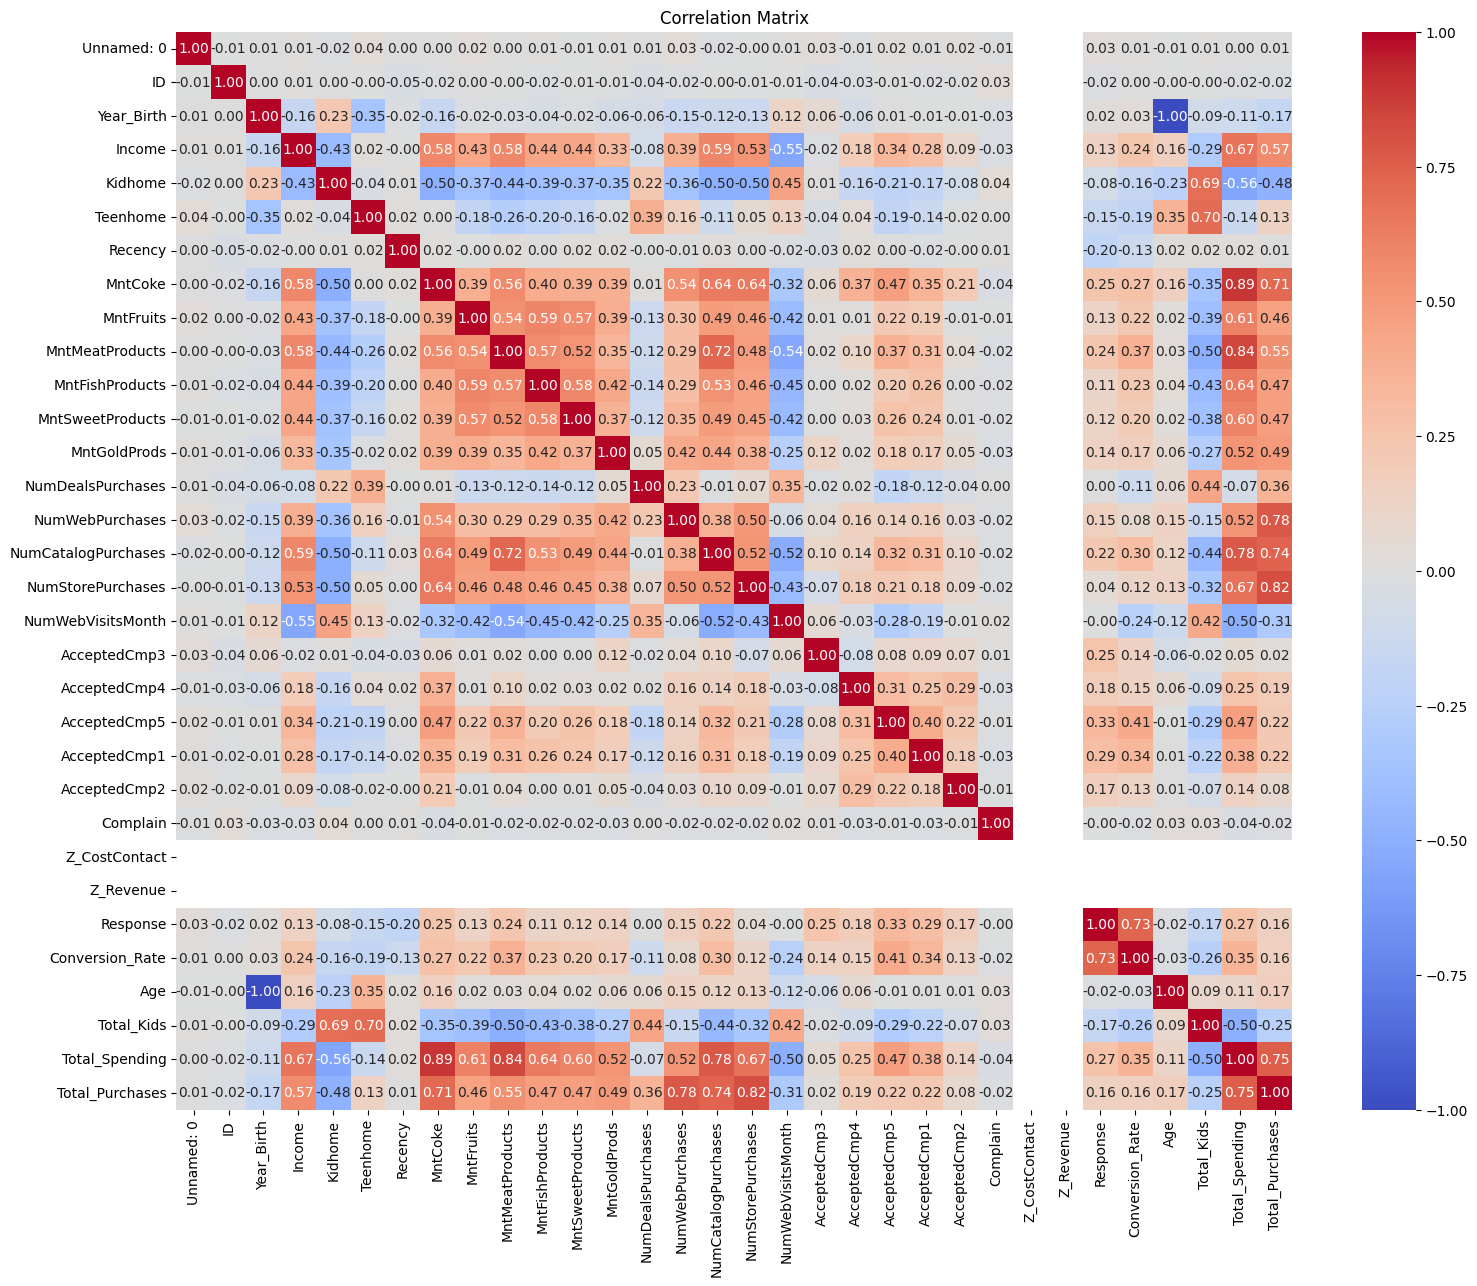

In [26]:
# Mengambil hanya fitur numerik
numeric_df = df.select_dtypes(include=[np.number])

# Pengecekan Correlation matrix antar fitur
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

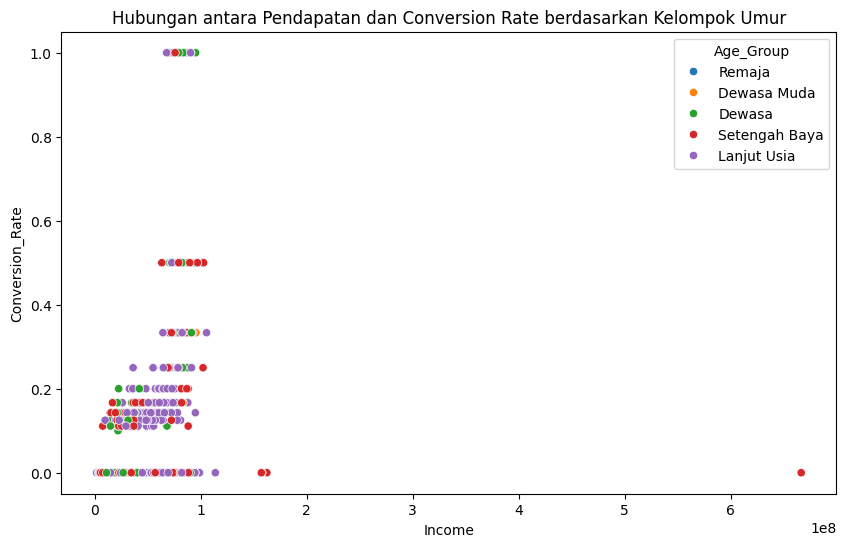

In [27]:
# Analisis lebih dalam terhadap korelasi yang signifikan
# Melihat korelasi antara pendapatan dan conversion rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Conversion_Rate', data=df, hue='Age_Group')
plt.title('Hubungan antara Pendapatan dan Conversion Rate berdasarkan Kelompok Umur')
plt.show()

### 2.4 Insights & Visualization

#### 2.4.1 Fact 1

> Sebagian besar conversion rate mendekati nol

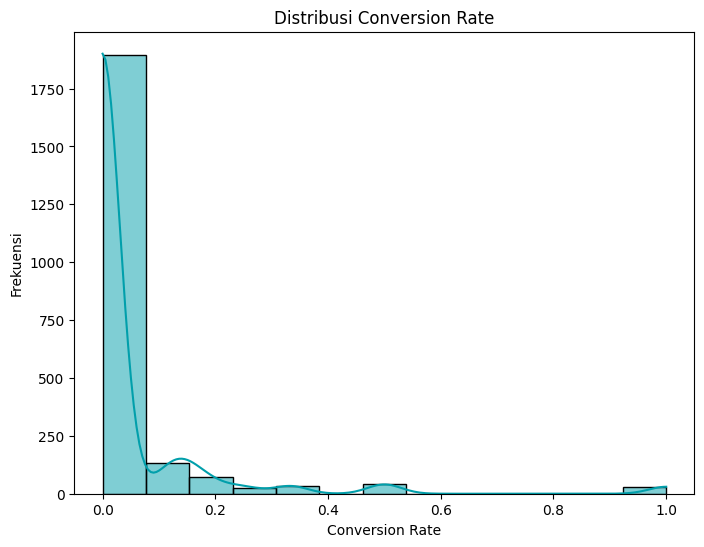

In [28]:
# Plot distribusi Conversion Rate
plt.figure(figsize=(8, 6))
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'none', 'grid.color':'#fdc039'})
sns.histplot(df['Conversion_Rate'], kde=True, color='#019fab')
plt.title('Distribusi Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan grafik tersebut, dapat diambil beberapa insight yaitu sebagai berikut.
- Efektivitas kampanye pemasaran yang kurang, mengingat sebagian besar Conversion Rate mendekati 0, kampanye pemasaran saat ini kurang efektif dalam mendorong pengunjung untuk berkonversi.

- Segmentasi pengunjung, mengingat ada sebagian kecil pengunjung dengan Conversion Rate yang tinggi, ini menunjukkan adanya segmen pengunjung yang merespon dengan baik. Perusahaan bisa fokus untuk mengidentifikasi karakteristik segmen ini dan menyesuaikan strategi pemasaran untuk menarik lebih banyak pengunjung seperti mereka.

- Perlu meningkatkan engagement, dengan banyaknya pengunjung yang memiliki Conversion Rate sangat rendah, perusahaan perlu mencari cara untuk meningkatkan engagement di website.

#### 2.4.2 Fact 2

> Sebagian besar pelanggan berada dalam rentang usia 40-60 tahun

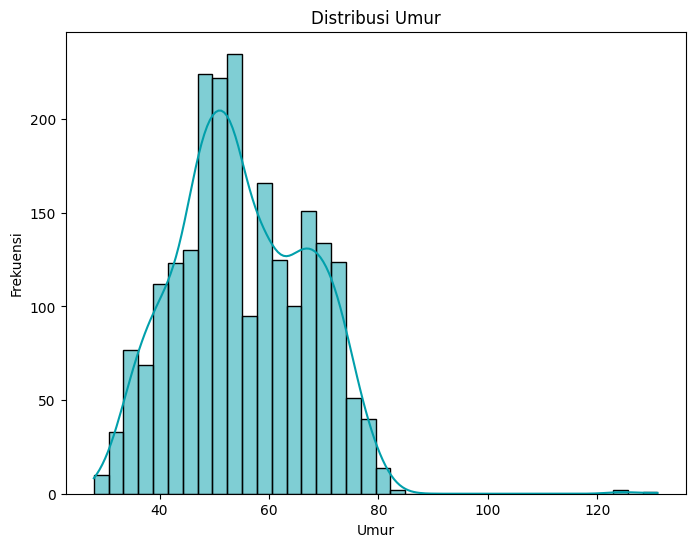

In [29]:
# Plot distribusi Umur
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='#019fab')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Dari grafik tersebut, dapat diambil beberapa insight yaitu sebagai berikut.

- Target pasar utama, dengan mayoritas pelanggan berada dalam rentang usia 40-60 tahun, perusahaan dapat menyimpulkan bahwa target pasar utama saat ini adalah kelompok usia menengah hingga lanjut usia. Oleh karena itu, strategi pemasaran dan produk yang dikembangkan harus relevan dengan preferensi dan kebutuhan mereka.

- Peluang untuk segmentasi pasar, mengingat adanya variasi dalam distribusi umur, perusahaan memiliki peluang untuk melakukan segmentasi pasar lebih lanjut berdasarkan usia. Misalnya, perusahaan bisa menciptakan kampanye pemasaran yang lebih khusus dan relevan untuk kelompok usia yang lebih muda (30-40 tahun) atau lebih tua (60 tahun ke atas).

- Adanya outlier di usia lebih dari 100 tahun, menunjukkan bahwa adanya segmen pelanggan yang sangat tua.

#### 2.4.3 Fact 3

> Kelompok dewasa muda adalah kelompok umur dengan pengeluaran tertinggi

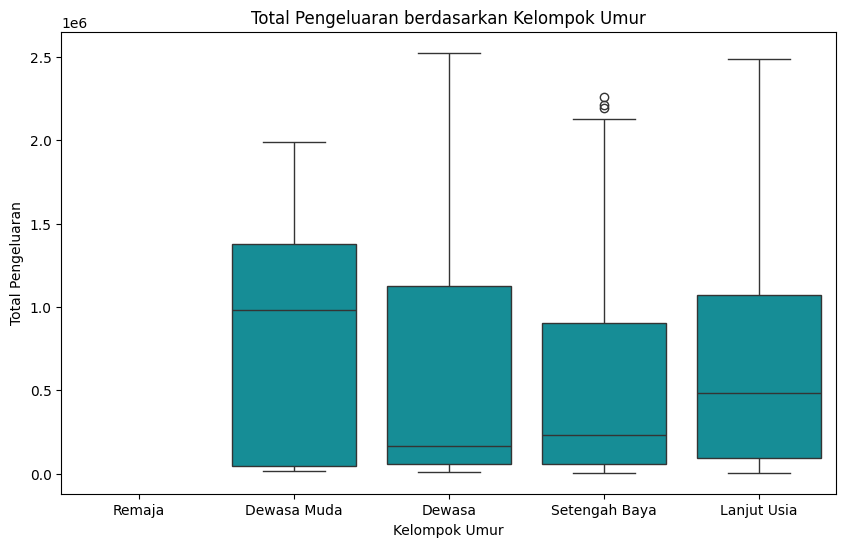

In [30]:
# Plot hubungan antara Total Spending dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Total_Spending', data=df, color='#019fab')
plt.title('Total Pengeluaran berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Pengeluaran')
plt.show()

Dari grafik tersebut, dapat diambil beberapa insight yaitu sebagai berikut.

- Kelompok umur dengan pengeluaran tertinggi, yakni kelompok dewasa muda bisa menjadi target pasar yang menarik untuk kampanye pemasaran yang difokuskan pada produk atau layanan premium.

- Preferensi belanja berdasarkan kelompok umur, hal ini bisa menunjukkan preferensi belanja yang berbeda. Dengan memahami preferensi ini bisa membantu perusahaan menyesuaikan penawaran produk mereka.

- Analisis outlier untuk strategi khusus, pelanggan yang termasuk outliers mungkin merupakan high spenders yang bisa diberikan penawaran khusus atau layanan premium untuk meningkatkan loyalitas. Di sisi lain, outliers dengan pengeluaran sangat rendah juga dapat dianalisis untuk memahami hambatan pengeluaran mereka dan mengembangkan strategi untuk mengatasi hal ini.

#### 2.4.4 Fact 4

> Kelompok dewasa muda adalah kelompok umur dengan total transaksi tertinggi

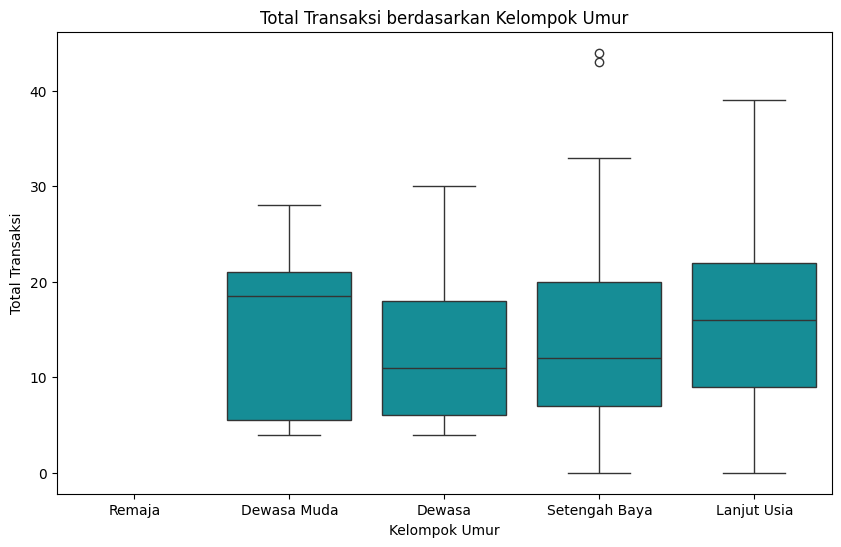

In [31]:
# Plot hubungan antara Total Purchases dan Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Total_Purchases', data=df, color='#019fab')
plt.title('Total Transaksi berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Total Transaksi')
plt.show()

Dari grafik tersebut, dapat diambil beberapa insight yaitu sebagai berikut.

- Kelompok umur dengan aktivitas transaksi tertinggi, yakni kelompok dewasa muda dimana kelompok ini lebih aktif berbelanja. Perusahaan dapat memfokuskan upaya pemasaran mereka untuk meningkatkan engagement dengan kelompok ini, misalnya melalui penawaran khusus atau program loyalitas.

- Variasi pola perilaku transaksi berdasarkan kelompok umur, menunjukkan perbedaan perilaku pembelian. Kelompok yang lebih muda mungkin lebih sering melakukan pembelian dalam jumlah kecil, sementara kelompok yang lebih tua mungkin melakukan pembelian yang lebih jarang namun dalam jumlah yang lebih besar.

- Analisis outlier untuk penawaran khusus, outliers dengan jumlah transaksi yang sangat tinggi bisa jadi merupakan pelanggan setia atau pelanggan dengan potensi tinggi. Perusahaan dapat mempertimbangkan untuk memberikan penawaran khusus atau penghargaan kepada pelanggan ini untuk meningkatkan loyalitas mereka. Sebaliknya, outliers dengan jumlah transaksi yang sangat rendah mungkin memerlukan pendekatan yang berbeda untuk meningkatkan keterlibatan mereka.

# Tugas 2

## 1. Overview

Sebelum memulai pemrosesan data, tahap paling awal yang harus dilakukan adalah mempersiapkan data mentah menjadi data yang bersih dan siap diolah. Kamu harus melakukan data preprocessing, yakni menangani berbagai permasalahan data seperti data yang kosong, data yang tidak sesuai, hingga mengidentifikasi data-data yang tidak dibutuhkan.

## 2. Stages of Work

### 2.1 Handling Data Null & Duplicated

In [45]:
df_clean = df.copy()

In [46]:
# Mengisi Nilai Null pada Kolom 'Income' dengan Mean
df_clean['Income'].fillna(df_clean['Income'].mean(), inplace=True)

# Mengisi Nilai Null pada Kolom 'Conversion_Rate' dengan 0
df_clean['Conversion_Rate'].fillna(0, inplace=True)


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_31640\700794923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Income'].fillna(df_clean['Income'].mean(), inplace=True)
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_31640\700794923.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

- Melakukan handling data null pada fitur Income dan Conversion_Rate.
    - Data null pada fitur Incomde diisi dengan mean dari Income.
    - Data null pada fitur Conversion Rate diisi dengan nilai 0.
- Data pada dataset ini tidak ada yang data duplicate.

In [47]:
df_clean['Income'].mean()

np.float64(52247251.35379061)

In [48]:
result = df_clean.loc[df_clean['Conversion_Rate'].isna()]
result[['ID', 'Response', 'Conversion_Rate', 'NumWebVisitsMonth']][:7]

,ID,Response,Conversion_Rate,NumWebVisitsMonth


In [49]:
result = df_clean.loc[df_clean['Income'].isna()]
result[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income']][:7]

,ID,Year_Birth,Education,Marital_Status,Income


### 2.2 Drop Features

In [50]:
# Menghapus Fitur yang Tidak Diperlukan
drop_features = [   'Unnamed: 0', 'ID', 'Response', 'NumWebVisitsMonth', 
                    'Year_Birth', 'Age', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                    'NumCatalogPurchases', 'NumStorePurchases', 
                    'Dt_Customer', 'Z_CostContact', 'Z_Revenue'
                ]
# df.drop(drop_features, axis=1, inplace=True)
df_clean = df_clean.drop(drop_features, axis=1, inplace=False)
df_clean


,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Conversion_Rate,Age_Group,Total_Kids,Total_Spending,Total_Purchases
0,S1,Lajang,58138000.0,58,0,0,0,0,0,0,0.142857,Lanjut Usia,0,1617000,25
1,S1,Lajang,46344000.0,38,0,0,0,0,0,0,0.000000,Lanjut Usia,2,27000,6
2,S1,Bertunangan,71613000.0,26,0,0,0,0,0,0,0.000000,Lanjut Usia,0,776000,21
3,S1,Bertunangan,26646000.0,26,0,0,0,0,0,0,0.000000,Dewasa,1,53000,8
4,S3,Menikah,58293000.0,94,0,0,0,0,0,0,0.000000,Setengah Baya,1,422000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,Menikah,61223000.0,46,0,0,0,0,0,0,0.000000,Lanjut Usia,1,1341000,18
2236,S3,Bertunangan,64014000.0,56,0,0,0,1,0,0,0.000000,Lanjut Usia,3,444000,22
2237,S1,Cerai,56981000.0,91,0,1,0,0,0,0,0.000000,Setengah Baya,0,1241000,19
2238,S2,Bertunangan,69245000.0,8,0,0,0,0,0,0,0.000000,Lanjut Usia,1,843000,23


In [51]:
df_clean.shape

(2240, 15)

- Fitur-fitur yang dihapus yakni fitur-fitur yang telah diolah pada tahap feature engineering dan fitur yang tidak diperlukan seperti 'Unnamed: 0', 'ID', 'Z_CostContact', dan 'Z_Revenue'.

### 2.3 Feature Encoding

In [52]:
# Mengatur urutan kategori untuk fitur Education, Marital_Status, Age_Group
education_mapping = {
    'SMA': 0,
    'D3': 1,
    'S1': 2,
    'S2': 3,
    'S3': 4
}

marital_status_mapping = {
    'Lajang': 0,
    'Bertunangan': 1,
    'Menikah': 2,
    'Cerai': 3,
    'Janda': 4,
    'Duda': 5
}

age_group_mapping = {
    'Remaja': 0,
    'Dewasa Muda': 1,
    'Dewasa': 2,
    'Setengah Baya': 3,
    'Lanjut Usia': 4
}

In [53]:
df_clean[['Education', 'Marital_Status', 'Age_Group']].head(7)

,Education,Marital_Status,Age_Group
0,S1,Lajang,Lanjut Usia
1,S1,Lajang,Lanjut Usia
2,S1,Bertunangan,Lanjut Usia
3,S1,Bertunangan,Dewasa
4,S3,Menikah,Setengah Baya
5,S2,Bertunangan,Lanjut Usia
6,S1,Cerai,Lanjut Usia


In [54]:
# Melakukan feature encoding untuk feature categorical
df_clean['Education'] = df_clean['Education'].map(education_mapping)
df_clean['Marital_Status'] = df_clean['Marital_Status'].map(marital_status_mapping)
df_clean['Age_Group'] = df_clean['Age_Group'].map(age_group_mapping)

In [55]:
df_clean[['Education', 'Marital_Status', 'Age_Group']].head(7)

,Education,Marital_Status,Age_Group
0,2,0,4
1,2,0,4
2,2,1,4
3,2,1,2
4,4,2,3
5,3,1,4
6,2,3,4


- Fitur-fitur yang dilakukan proses encoding yakni 'Education', 'Marital_Status', dan 'Age_Group'.
- Untuk urutan dari fitur Education dari yang terendah ke tertinggi yakni SMA, D3, S1, S2, S3.
- Untuk urutan dari fitur Marital_Statusdari yang terendah ke tertinggi yakni 'Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'.
- Untuk urutan dari fitur Age_Group dari yang terendah ke tertinggi yakni 'Remaja', 'Dewasa Muda', 'Dewasa', 'Setengah Baya', 'Lanjut Usia'.

### 2.4 Standardization

In [56]:
# Identifikasi fitur numerik untuk standarisasi
numeric_features = ['Income', 'Recency', 
                    'Total_Kids', 'Total_Spending', 
                    'Total_Purchases']

scaler = StandardScaler()
df_clean[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

- Proses standarisasi dilakukan untuk setiap fitur numerik agar berada ke skala di mana nilai rata-rata 0 dan standar deviasi adalah 1.
- Fitur-fitur yang dilakukan standarisasi yakni 'Income', 'Recency', 'Total_Kids', 'Total_Spending', dan 'Total_Purchases'.

# Tugas 3

## 1. Overview

Supaya hasil dari model valid dan robust, kita harus mempunyai data yang bersih dan siap untuk diolah dengan menggunakan algoritma yang akan kita gunakan. Oleh karena itu, data yang sudah di-cleaning pada tahap sebelumnya akan digunakan untuk pemodelan data dengan melakukan task clustering. Pada tahap ini, kamu diminta untuk menerapkan algoritma k-means clustering pada dataset yang ada, pilihlah jumlah cluster yang tepat dengan melihat dari elbow method, dan lakukan evaluasi dengan menggunakan silhouette score.

## 2. Stages of Work

### 2.1 Determining Number of Clusters with Elbow Method

In [157]:
# Menghitung WCSS untuk berbagai jumlah cluster:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)

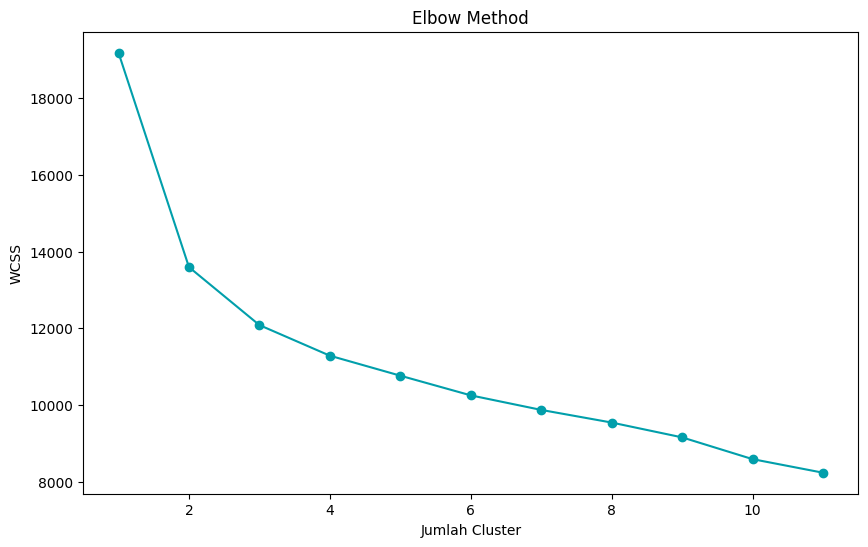

In [158]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), wcss, marker='o', color='#019fab')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [165]:
n_cluster = 5

- Dari grafik tersebut, titik siku berada di sekitar cluster ke-5. Setelah titik ini, penurunan WCSS menjadi lebih landai dan tidak terlalu signifikan. Oleh karena itu, jumlah cluster yang tepat untuk digunakan adalah 5 cluster.

### 2.2  Implementation of Clustering with K-Means

In [166]:
# Menerapkan K-Means Clustering
kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_clean)

In [167]:
# Menambahkan label cluster ke dataframe
df_clean['Cluster'] = cluster_labels

In [168]:
df_clean

,Education,Marital_Status,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Conversion_Rate,Age_Group,Total_Kids,Total_Spending,Total_Purchases,Cluster
0,2,0,0.235327,0.307039,0,0,0,0,0,0,0.142857,4,-1.264505,1.679417,1.320826,4
1,2,0,-0.235826,-0.383664,0,0,0,0,0,0,0.000000,4,1.396361,-0.961275,-1.154596,3
2,2,1,0.773633,-0.798086,0,0,0,0,0,0,0.000000,4,-1.264505,0.282673,0.799685,2
3,2,1,-1.022732,-0.798086,0,0,0,0,0,0,0.000000,2,0.065928,-0.918094,-0.894025,0
4,4,2,0.241519,1.550305,0,0,0,0,0,0,0.000000,3,0.065928,-0.305254,0.539114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,2,0.358568,-0.107383,0,0,0,0,0,0,0.000000,4,0.065928,1.221032,0.408829,2
2236,4,1,0.470064,0.237969,0,0,0,1,0,0,0.000000,4,2.726794,-0.268717,0.929970,3
2237,2,3,0.189106,1.446700,0,1,0,0,0,0,0.000000,3,-1.264505,1.054951,0.539114,1
2238,3,1,0.679035,-1.419719,0,0,0,0,0,0,0.000000,4,0.065928,0.393948,1.060255,2


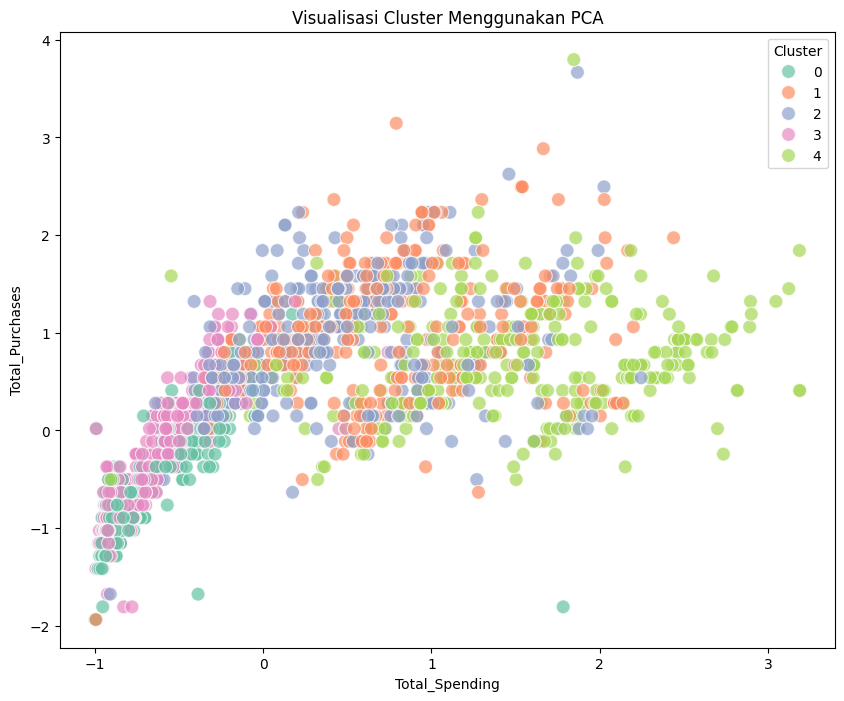

In [169]:
# Scatter plot untuk visualisasi cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total_Spending', y='Total_Purchases', hue='Cluster', data=df_clean, palette='Set2', s=100, alpha=0.7)
plt.title('Visualisasi Cluster Menggunakan PCA')
plt.xlabel('Total_Spending')
plt.ylabel('Total_Purchases')
plt.legend(title='Cluster', loc='upper right')
plt.show()

### 2.3 Calculation of Silhouette Score for Model Evaluation

In [170]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_clean, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.2585


- Nilai 0.2585 lebih dekat ke 0 daripada 1, yang menunjukkan bahwa clustering yang dilakukan oleh K-Means dengan 5 cluster tidak terlalu baik. Data tidak dikelompokkan secara jelas atau ada beberapa titik data yang tidak sesuai dengan cluster mereka.